In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns
sns.set()
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [55]:
df = pd.read_csv('Final_invoice.csv')

In [56]:
df.head()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,Claim No.,Cust Type,Customer No.,District,Expiry Date,Gate Pass Date,Gate Pass Time,IGST(12%),IGST(18%),IGST(28%),IGST(5%),Insurance Company,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,ODN No.,OSL Total,Order Type,Outstanding Amt,Parts Total,Pin code,Plant,Plant Name1,Policy no.,Print Status,Recovrbl Exp,Regn No,SGST/UGST(14%),SGST/UGST(2.5%),SGST/UGST(6%),SGST/UGST(9%),Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.000,0.000,MAJIWADA,0.000,0.000,0.000,0.000,Thane,NaN,NaN,Retail,67849,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,7005200002.000,500.060,Paid Service,0.000,2348.750,400601,BC01,THANE,NaN,NO,0.000,KA19MA1291,0.000,0.000,0.000,0.000,nan,0.000,RUPESH,4051.950,0.000,0.000,0.000,0.000,4051.950,BC01FS1
1,1,0.000,0.000,THNAE,0.000,0.000,0.000,0.000,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,7005200003.000,0.000,SMC Value Package,0.000,0.000,400603,BC01,THANE,NaN,NO,0.000,MH43R3046,0.000,0.000,0.000,0.000,nan,0.000,PRASHANT,1001.290,0.000,0.000,0.000,0.000,1001.290,BC01SA2
2,2,0.000,0.000,THANE,0.000,0.000,0.000,0.000,THANE[W],NaN,NaN,Retail,81055,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,7005200004.000,0.000,Running Repairs,0.000,52.950,400607,BC01,THANE,NaN,NO,0.000,AP09AX0582,0.000,0.000,0.000,0.000,nan,0.000,IMRAN,233.140,0.000,0.000,0.000,0.000,233.140,BC01SA2
3,3,0.000,0.000,THNAE,0.000,0.000,0.000,0.000,THNAE,NaN,NaN,Retail,84419,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,7005200005.000,0.000,SMC Redemption,0.000,0.000,400603,BC01,THANE,NaN,NO,0.000,MH43R3046,0.000,0.000,0.000,0.000,nan,0.000,PRASHANT,0.000,0.000,0.000,0.000,0.000,0.000,BC01SA2
4,4,0.000,0.000,THANE,0.000,0.000,0.000,0.000,THANE,NaN,NaN,Retail,18980,Maharashtra,NaN,NaN,00:00:00,0.000,0.000,0.000,0.000,NaN,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,7005200006.000,499.990,Paid Service,0.000,944.160,400603,BC01,THANE,NaN,NO,0.000,MH04CD9768,0.000,0.000,0.000,0.000,nan,0.000,DAYANAND,2747.120,0.000,0.000,0.000,0.000,2747.120,BC01SA2


In [57]:
columns_to_be_removed = df.isnull().sum()[df.isnull().sum().sort_values() > 197285].index

In [58]:
invoice = df.drop(columns=columns_to_be_removed)

In [59]:
import datetime as dt

In [60]:
invoice['Invoice Date'] = pd.to_datetime(invoice['Invoice Date'])

In [61]:
def get_month(x): return dt.datetime(x.year, x.month,1)
invoice['InvoiceMonth'] = invoice['Invoice Date'].apply(get_month)
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-01-01
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-01-01
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-01-01
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-01-01
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-01-01


In [62]:
invoice['InvoiceMY'] = invoice['InvoiceMonth'].astype('str')

In [63]:
invoice['InvoiceMY'] = invoice['InvoiceMY'].apply(lambda x:x[:7])

In [64]:
grouping = invoice.groupby('Customer No.')['InvoiceMonth']
invoice['CohortMonth'] = grouping.transform('min')
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,InvoiceMY,CohortMonth
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-01-01,2015-01,2014-08-01
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-01-01,2015-01,2015-01-01
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-01-01,2015-01,2014-12-01
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-01-01,2015-01,2015-01-01
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-01-01,2015-01,2013-07-01


In [65]:
invoice['CohortMY'] = invoice['CohortMonth'].astype('str')
invoice['CohortMY'] = invoice['CohortMY'].apply(lambda x:x[:7])

In [66]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,InvoiceMY,CohortMonth,CohortMY
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-01-01,2015-01,2014-08-01,2014-08
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-01-01,2015-01,2015-01-01,2015-01
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-01-01,2015-01,2014-12-01,2014-12
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-01-01,2015-01,2015-01-01,2015-01
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-01-01,2015-01,2013-07-01,2013-07


In [67]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [68]:
invoice_year, invoice_month, _ = get_date_int(invoice, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(invoice, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
invoice['CohortIndex'] = years_diff * 12 + months_diff + 1
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,InvoiceMY,CohortMonth,CohortMY,CohortIndex
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-01-01,2015-01,2014-08-01,2014-08,6
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-01-01,2015-01,2015-01-01,2015-01,1
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-01-01,2015-01,2014-12-01,2014-12,2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-01-01,2015-01,2015-01-01,2015-01,1
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-01-01,2015-01,2013-07-01,2013-07,19


In [50]:
invoice.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,CohortMonth,CohortIndex,InvoiceMY
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-01-01,2014-08-01,6,2015-01
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-01-01,2015-01-01,1,2015-01
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-01-01,2014-12-01,2,2015-01
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-01-01,2015-01-01,1,2015-01
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-01-01,2013-07-01,19,2015-01


In [69]:
grouping = invoice.groupby(['CohortMY', 'CohortIndex'])
grouping


In [70]:
cohort_data = grouping['Customer No.'].apply(pd.Series.nunique)
cohort_data

CohortMY  CohortIndex
2012-04   1               1135
          2                150
          3                138
          4                159
          5                158
                         ...  
2016-08   2               1169
          3               1036
2016-09   1              14023
          2               1466
2016-10   1              15657
Name: Customer No., Length: 1540, dtype: int64

In [71]:
cohort_data = cohort_data.reset_index()
cohort_data.head(60)

,CohortMY,CohortIndex,Customer No.
0,2012-04,1,1135
1,2012-04,2,150
2,2012-04,3,138
3,2012-04,4,159
4,2012-04,5,158
5,2012-04,6,132
6,2012-04,7,148
7,2012-04,8,138
8,2012-04,9,120
9,2012-04,10,126


In [72]:
cohort_counts = cohort_data.pivot(index='CohortMY',columns='CohortIndex',values='Customer No.')

In [73]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
CohortMY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-04,1135.000,150.000,138.000,159.000,158.000,132.000,148.000,138.000,120.000,126.000,116.000,126.000,89.000,103.000,91.000,95.000,78.000,59.000,79.000,67.000,68.000,56.000,61.000,55.000,52.000,49.000,52.000,51.000,40.000,45.000,44.000,38.000,30.000,35.000,29.000,26.000,29.000,34.000,29.000,20.000,19.000,38.000,20.000,24.000,25.000,23.000,27.000,19.000,25.000,14.000,11.000,15.000,17.000,13.000,8.000
2012-05,1184.000,118.000,117.000,130.000,121.000,112.000,132.000,119.000,108.000,101.000,111.000,101.000,72.000,85.000,83.000,69.000,57.000,73.000,54.000,68.000,55.000,40.000,50.000,36.000,49.000,43.000,35.000,51.000,27.000,39.000,43.000,32.000,28.000,23.000,21.000,32.000,39.000,16.000,24.000,21.000,17.000,17.000,24.000,17.000,21.000,20.000,20.000,27.000,22.000,10.000,9.000,13.000,13.000,12.000,nan
2012-06,1176.000,106.000,88.000,109.000,119.000,123.000,145.000,93.000,127.000,99.000,98.000,88.000,93.000,76.000,83.000,51.000,63.000,71.000,65.000,59.000,46.000,52.000,50.000,48.000,46.000,54.000,31.000,36.000,35.000,31.000,29.000,33.000,25.000,16.000,34.000,25.000,28.000,32.000,23.000,15.000,19.000,20.000,15.000,18.000,14.000,14.000,14.000,19.000,6.000,11.000,9.000,7.000,7.000,nan,nan
2012-07,1206.000,103.000,70.000,114.000,112.000,118.000,128.000,108.000,78.000,73.000,85.000,83.000,75.000,64.000,63.000,72.000,57.000,50.000,45.000,53.000,57.000,38.000,36.000,36.000,40.000,47.000,45.000,48.000,35.000,40.000,28.000,28.000,25.000,33.000,24.000,30.000,26.000,18.000,24.000,21.000,21.000,30.000,17.000,19.000,22.000,23.000,13.000,7.000,15.000,17.000,11.000,13.000,nan,nan,nan
2012-08,985.000,73.000,66.000,84.000,92.000,70.000,71.000,78.000,56.000,59.000,50.000,47.000,46.000,40.000,50.000,40.000,49.000,34.000,33.000,33.000,27.000,32.000,28.000,25.000,22.000,32.000,22.000,15.000,30.000,22.000,17.000,17.000,19.000,22.000,8.000,20.000,13.000,21.000,13.000,19.000,16.000,12.000,12.000,16.000,18.000,7.000,6.000,8.000,7.000,6.000,8.000,nan,nan,nan,nan
2012-09,894.000,72.000,60.000,84.000,74.000,73.000,84.000,67.000,64.000,59.000,65.000,46.000,55.000,52.000,52.000,47.000,39.000,43.000,38.000,33.000,27.000,33.000,28.000,27.000,27.000,21.000,21.000,27.000,17.000,16.000,25.000,22.000,23.000,24.000,15.000,8.000,19.000,15.000,18.000,11.000,19.000,14.000,15.000,14.000,9.000,3.000,5.000,6.000,6.000,10.000,nan,nan,nan,nan,nan
2012-10,1093.000,85.000,77.000,69.000,87.000,50.000,69.000,63.000,65.000,53.000,58.000,61.000,55.000,34.000,60.000,43.000,32.000,37.000,27.000,37.000,42.000,32.000,31.000,22.000,36.000,32.000,25.000,26.000,18.000,17.000,25.000,25.000,26.000,19.000,13.000,22.000,19.000,22.000,20.000,13.000,15.000,18.000,16.000,11.000,8.000,6.000,10.000,6.000,9.000,nan,nan,nan,nan,nan,nan
2012-11,1345.000,93.000,66.000,78.000,71.000,64.000,90.000,89.000,71.000,81.000,61.000,74.000,75.000,54.000,50.000,38.000,37.000,41.000,54.000,39.000,36.000,36.000,42.000,40.000,44.000,21.000,29.000,35.000,20.000,30.000,22.000,19.000,25.000,20.000,21.000,24.000,23.000,20.000,25.000,18.000,15.000,22.000,14.000,9.000,12.000,15.000,11.000,15.000,nan,nan,nan,nan,nan,nan,nan
2012-12,1297.000,95.000,68.000,81.000,79.000,72.000,93.000,77.000,49.000,71.000,69.000,50.000,58.000,60.000,46.000,32.000,44.000,36.000,38.000,34.000,28.000,39.000,34.000,38.000,24.000,29.000,20.000,18.000,27.000,25.000,26.000,18.000,14.000,13.000,15.000,24.000,25.000,12.000,19.000,15.000,13.000,5.000,6.000,9.000,9.000,7.000,4.000,nan,nan,nan,nan,nan,nan,nan,nan


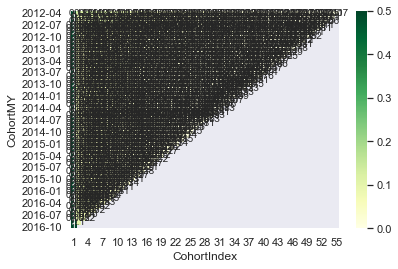

In [74]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
churn = 1 - retention
sns.heatmap(retention, annot=True, vmin=0, vmax=0.5, cmap="YlGn")

In [76]:
# Calculate monthly spend per customer
monthly_revenue = invoice.groupby(['Customer No.','InvoiceMonth'])['Total Amt Wtd Tax.'].sum().mean()
# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)
# Define lifespan to 36 months
lifespan_months = 12
# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months
# Print basic CLV value
print('Average basic CLV is {:.1f} INR'.format(clv_basic))

Average basic CLV is 61520.1 INR


In [79]:
# Calculate average revenue per invoice
revenue_per_purchase = invoice.groupby(['Invoice No'])['Total Amt Wtd Tax.'].mean().mean()
# Calculate average number of unique invoices per customer per month
freq = invoice.groupby(['Customer No.','InvoiceMonth'])['Invoice No'].nunique().mean()
# Define lifespan to 36 months
lifespan_months = 12
# Calculate granular CLV
clv_granular = revenue_per_purchase * freq * lifespan_months
# Print granular CLV value
print('Average granular CLV is {:.1f} INR'.format(clv_granular))

Average granular CLV is 61520.1 INR


In [80]:
# Calculate monthly spend per customer
monthly_revenue = invoice.groupby(['Customer No.','InvoiceMonth'])['Total Amt Wtd Tax.'].sum().mean()
# Calculate average monthly retention rate
retention_rate = retention_rate = retention.iloc[:,1:].mean().mean()
# Calculate average monthly churn rate
churn_rate = 1 - retention_rate
# Calculate traditional CLV
clv_traditional = monthly_revenue * (retention_rate / churn_rate)
# Print traditional CLV and the retention rate values
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format(
clv_traditional, retention_rate*100))

Average traditional CLV is 141.2 USD at 2.7 % retention_rate


In [82]:
# Explore monthly distribution of observations
invoice.groupby(['InvoiceMY']).size()

InvoiceMY
2012-04     1531
2012-05     1792
2012-06     1891
2012-07     2150
2012-08     1922
2012-09     1839
2012-10     2210
2012-11     2618
2012-12     2682
2013-01     2586
2013-02     2709
2013-03     2892
2013-04     3345
2013-05     3665
2013-06     4241
2013-07     4791
2013-08     4944
2013-09     5342
2013-10     6787
2013-11     6652
2013-12     8103
2014-01     7818
2014-02     8408
2014-03     9492
2014-04     8063
2014-05     7919
2014-06     7643
2014-07     7594
2014-08     7237
2014-09     7516
2014-10     6920
2014-11     8152
2014-12     8855
2015-01     8674
2015-02     8238
2015-03     8958
2015-04    10178
2015-05    10645
2015-06    10089
2015-07    11392
2015-08     9790
2015-09    11239
2015-10    10635
2015-11    10723
2015-12    14158
2016-01    12728
2016-02    15926
2016-03    16186
2016-04    16547
2016-05    19041
2016-06    19007
2016-07    23854
2016-08    22935
2016-09    24189
2016-10    26873
dtype: int64

In [83]:
invoice.columns

Index(['Unnamed: 0', 'Area / Locality', 'CITY', 'Cust Type', 'Customer No.',
       'District', 'Gate Pass Time', 'Invoice Date', 'Invoice No',
       'Invoice Time', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'Total Amt Wtd Tax.', 'User ID', 'InvoiceMonth', 'InvoiceMY',
       'CohortMonth', 'CohortMY', 'CohortIndex'],
      dtype='object')

In [100]:
invoice.shape

(492314, 34)

In [98]:
# Exclude target variable
online_X = invoice[invoice['InvoiceMonth']!='2016-10']

In [99]:
online_X

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,InvoiceMonth,InvoiceMY,CohortMonth,CohortMY,CohortIndex
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,1203.140,GENERAL MOTORS,0.000,SPARK,500.060,Paid Service,2348.750,400601,BC01,THANE,NO,0.000,KA19MA1291,4051.950,BC01FS1,2015-01-01,2015-01,2014-08-01,2014-08,6
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,173997,2015-01-02,14:12:18,78584,804.260,TATA MOTORS,197.030,INDICA,0.000,SMC Value Package,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,1001.290,BC01SA2,2015-01-01,2015-01,2015-01-01,2015-01,1
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,173889,2015-01-02,11:40:44,33985,180.190,MARUTI SUZUKI,0.000,ZEN,0.000,Running Repairs,52.950,400607,BC01,THANE,NO,0.000,AP09AX0582,233.140,BC01SA2,2015-01-01,2015-01,2014-12-01,2014-12,2
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,174158,2015-01-03,10:12:32,78584,0.000,TATA MOTORS,0.000,INDICA,0.000,SMC Redemption,0.000,400603,BC01,THANE,NO,0.000,MH43R3046,0.000,BC01SA2,2015-01-01,2015-01,2015-01-01,2015-01,1
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,173860,2015-01-02,10:45:42,50057,1202.970,HYUNDAI,100.000,SANTRO XING,499.990,Paid Service,944.160,400603,BC01,THANE,NO,0.000,MH04CD9768,2747.120,BC01SA2,2015-01-01,2015-01,2013-07-01,2013-07,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,2016-06-30,7231000017,14:56:58,400100,2016-06-30,09:15:12,72546,2495.900,MARUTI SUZUKI,374.970,ALTO,0.000,Paid Service,1587.280,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN38Y9343,4458.150,X405SA1,2016-06-01,2016-06,2016-06-01,2016-06,1
492310,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,2016-06-30,7231000018,15:06:52,400092,2016-06-30,08:42:15,18968,2443.470,NISSAN,0.000,MICRA,0.000,Paid Service,4388.610,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN22CK0396,6832.080,X405SA1,2016-06-01,2016-06,2016-03-01,2016-03,4
492311,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,2016-06-30,7231000019,15:43:56,400082,2016-06-30,08:27:51,177433,2598.920,MAHINDRA & MAHINDRA,0.000,SCORPIO CRDE,0.000,Paid Service,6588.790,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN07BA0211,9187.710,X405SA1,2016-06-01,2016-06,2014-03-01,2014-03,28
492312,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,2016-06-30,7231000020,15:58:59,400545,2016-06-30,12:53:48,22932,11000.000,HONDA,100.000,AMAZE,0.000,Accidental,0.000,600042,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.000,TN07BV9290,11100.000,X405SA1,2016-06-01,2016-06,2016-06-01,2016-06,1


In [102]:
# Exclude target variable
online_X = invoice[invoice['InvoiceMonth']!='2016-10']
# Define snapshot date
NOW = dt.datetime(2016,10,1)
# Build the features
features = online_X.groupby('Customer No.').agg({
'Invoice Date': lambda x: (NOW - x.max()).days,
'Invoice No': pd.Series.nunique,
'Total Amt Wtd Tax.': np.sum
})
features.columns = ['recency', 'frequency',
'monetary']

In [103]:
features.head()

,recency,frequency,monetary
Customer No.,,,
1,1281,4,0.000
10,1202,5,11105.560
100,1480,2,20799.740
1000,718,6,8813.440
10000,406,7,1735.520


In [87]:
invoice.shape

(492314, 34)

In [86]:
features.shape

(237827, 4)

In [104]:
# Build pivot table with monthly transactions per customer
cust_month_tx = pd.pivot_table(data=invoice, index=['Customer No.'],
values='Invoice No',
columns=['InvoiceMY'],
aggfunc=pd.Series.nunique, fill_value=0)


In [105]:
cust_month_tx.head()

InvoiceMY,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10
Customer No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
cust_month_tx.shape

(253484, 55)

In [106]:
df_final =pd.merge(features,cust_month_tx,how='left', on=['Customer No.'])


In [107]:
df_final

,recency,frequency,monetary,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10
Customer No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1281,4,0.000,0,1,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1202,5,11105.560,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100,1480,2,20799.740,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000,718,6,8813.440,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000,406,7,1735.520,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLX099,2,1,3249.340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
PLX109,1,2,4099.530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6
PLX312,53,1,567.800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [118]:
X = df_final.drop('2016-10',1)
Y = df_final['2016-10']

In [119]:
# Randomly split 25% of the data to testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y,
test_size=0.25,
random_state=99)
# Print shapes of the datasets
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(178370, 57) (178370,) (59457, 57) (59457,)


In [120]:
# Import the linear regression module
from sklearn.linear_model import LinearRegression
# Initialize the regression instance
linreg = LinearRegression()
# Fit model on the training data
linreg.fit(train_X, train_Y)
# Predict values on both training and testing data
train_pred_Y = linreg.predict(train_X)
test_pred_Y = linreg.predict(test_X)

In [121]:
# Import performance measurement functions
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))
mae_train = mean_absolute_error(train_Y, train_pred_Y)
# Calculate metrics for testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))
mae_test = mean_absolute_error(test_Y, test_pred_Y)
# Print performance metrics
print('RMSE train: {:.3f}; RMSE test: {:.3f}\nMAE train: {:.3f}, MAE test: {:.3f}'.format(
rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 0.286; RMSE test: 0.239
MAE train: 0.101, MAE test: 0.100


In [122]:
# Import the library
import statsmodels.api as sm
# Convert target variable to `numpy` array
train_Y = np.array(train_Y)
# Initialize and fit the model
olsreg = sm.OLS(train_Y, train_X)
olsreg = olsreg.fit()
# Print model summary
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.371
Model:                            OLS   Adj. R-squared (uncentered):              0.371
Method:                 Least Squares   F-statistic:                              1878.
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                        0.00
Time:                        01:09:44   Log-Likelihood:                         -32601.
No. Observations:              178370   AIC:                                  6.531e+04
Df Residuals:                  178314   BIC:                                  6.588e+04
Df Model:                          56                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------